In [1]:
import numpy as np
import matplotlib.pyplot as plt

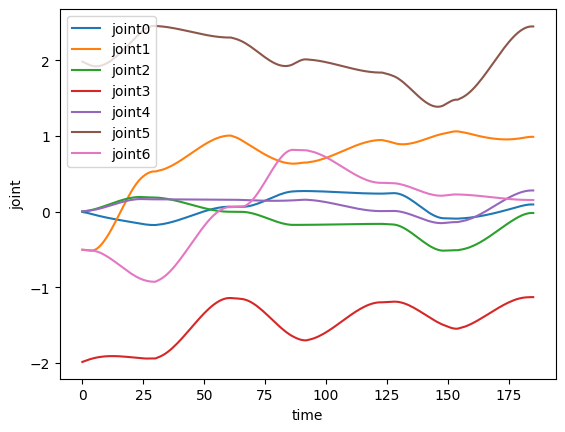

In [2]:
actions = np.load("./bridge_data/1/actions.npy")
for i in range(7):
    x = list(range(len(actions)))
    y = actions[:, i]
    plt.plot(x, y, label=f"joint{i}")
plt.xlabel("time")
plt.ylabel("joint")
plt.legend()
plt.show()

(186, 2)


/var/folders/3s/hzwnx0js65nd8l8bktfqjfxw0000gn/T/ipykernel_27080/1150084286.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


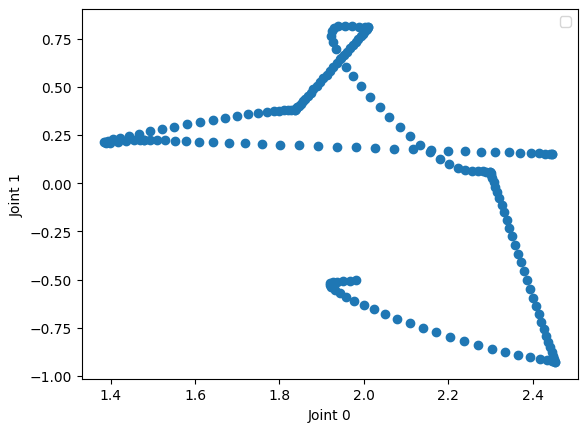

In [3]:
points = np.array(actions[:, 5:7])
print(points.shape)
plt.scatter(points[:, 0], points[:, 1])
plt.xlabel("Joint 0")
plt.ylabel("Joint 1")
plt.legend()
plt.show()

In [4]:
def fit_quadratic_spline(points: np.ndarray, max_cost: float = 1., degree: int=2) -> list:

    x = points[:, 0]
    y = points[:, 1]
    
    polynomials = []

    spline_start_idx = 0
    spline_end_idx = len(y)
    
    t = np.linspace(0, len(x), len(x))

    while True:
        
        while spline_end_idx - spline_start_idx > 4:

            t_seg = t[spline_start_idx:spline_end_idx]
            x_seg = x[spline_start_idx:spline_end_idx]
            y_seg = y[spline_start_idx:spline_end_idx]
            
            x_coeffs = np.polyfit(t_seg, x_seg, degree)
            y_coeffs = np.polyfit(t_seg, y_seg, degree)

            poly_x = np.poly1d(x_coeffs)
            poly_y = np.poly1d(y_coeffs)

            cost_x = np.sum(np.abs(poly_x(x_seg) - x_seg))
            cost_y = np.sum(np.abs(poly_y(y_seg) - y_seg))
            cost = (cost_x + cost_y)*.5
            if cost < max_cost:
                break

            spline_end_idx -= 1

        polynomials.append([*x_coeffs, *y_coeffs, (spline_end_idx - spline_start_idx)])

        if spline_end_idx == len(y):
            break

        spline_start_idx = spline_end_idx
        spline_end_idx = len(y)
    
    return polynomials

In [5]:
def plot_spline(points: np.ndarray, polynomials: list):

    x = points[:, 0]
    y = points[:, 1]
    
    # plt.scatter(x, y, color="red", label="Data points")
    
    current_time = 0
    for i, poly in enumerate(polynomials):
        t_range = np.linspace(current_time, current_time + poly[-1], poly[-1])
        x_poly = np.poly1d(poly[0:3])
        y_poly = np.poly1d(poly[3:6])
        x_range = x_poly(t_range)
        y_range = y_poly(t_range)
        if i%2:
            plt.plot(x_range, y_range, color="blue")
        else:
            plt.plot(x_range, y_range, color="red")
        current_time += poly[-1]
    
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("2D Quadratic Spline")
    plt.show()

Total segments: 41


/var/folders/3s/hzwnx0js65nd8l8bktfqjfxw0000gn/T/ipykernel_27080/855238385.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


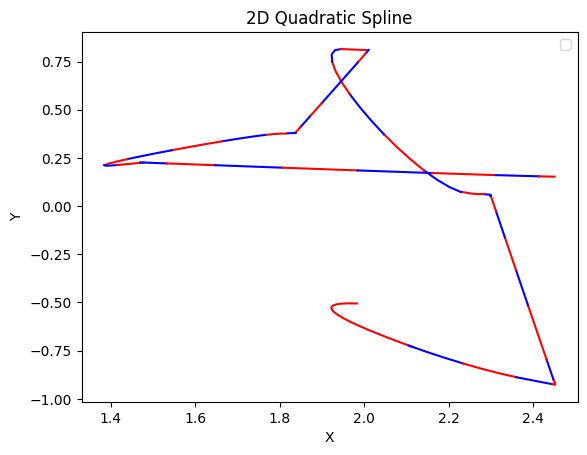

In [6]:
polynomials = fit_quadratic_spline(points)
print("Total segments:", len(polynomials))
plot_spline(points, polynomials)